Importing the libraries

In [1]:
#importing essential modules for loading datset and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importing modules for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from scipy import stats
import datetime

#importing modules for regression model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

#importing modules for measuring accuracy and mean square error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#importing module for filtering warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Reading and Understanding the Data<br>
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
#load the dataset(CSV file )
df = pd.read_csv("1805695.csv")

df.head() #head will display the first 5 rows of the dataset by default

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140106408,WAL-M in,2019-04-15 00:00:00,2019.0,2.960538e+09,2019-03-28,20190328,20190328,20190408.0,CAD,RV,1.0,NaN,71939.51,20190329.0,CA10,2.960538e+09,0
1,U001,0200771157,WEIS in,2019-03-05 00:00:00,2019.0,1.928811e+09,2019-02-18,20190218,20190218,20190305.0,USD,RV,1.0,NaN,42912.91,20190218.0,NAA8,1.928811e+09,0
2,U001,0200769623,WAL-MAR systems,2019-10-30 00:00:00,2019.0,1.930034e+09,2019-10-20,20191019,20191020,20191104.0,USD,RV,1.0,NaN,43050.84,20191020.0,NAH4,1.930034e+09,0
3,U001,0200769623,WAL-MAR in,2019-11-04 00:00:00,2019.0,1.930044e+09,2019-10-23,20191022,20191023,20191107.0,USD,RV,1.0,NaN,72242.34,20191023.0,NAH4,1.930044e+09,0
4,U001,0200833713,JETRO corporation,2019-08-13 00:00:00,2019.0,1.929661e+09,2019-07-24,20190724,20190724,20190813.0,USD,RV,1.0,NaN,3502.28,20190724.0,NAD1,1.929661e+09,0


Check the number of NULL values in the Dataset

In [3]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4658
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [4]:
#dropping area_business since it consists of only NULL values so it will not help in the prediction.
df = df.drop(['area_business'],axis=1)

In [5]:
#getting an statistical overview of the Dataset
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,50000.000000,5.000000e+04,4.999500e+04,50000.000000
mean,2019.212680,2.011434e+09,2.019259e+07,2.019262e+07,2.019278e+07,1.0,32469.129990,2.019262e+07,2.010685e+09,0.093160
std,0.409207,2.856536e+08,3.967926e+03,3.957566e+03,3.968159e+03,0.0,39942.959118,3.957115e+03,2.756756e+08,0.290659
min,2019.000000,1.928500e+09,2.018123e+07,2.018123e+07,2.018103e+07,1.0,1.810000,2.018102e+07,1.928500e+09,0.000000
25%,2019.000000,1.929250e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,4829.612500,2.019042e+07,1.929250e+09,0.000000
50%,2019.000000,1.929821e+09,2.019081e+07,2.019081e+07,2.019083e+07,1.0,17565.200000,2.019081e+07,1.929821e+09,0.000000
75%,2019.000000,1.930414e+09,2.019113e+07,2.019113e+07,2.019122e+07,1.0,47126.997500,2.019113e+07,1.930414e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020051e+07,2.020071e+07,1.0,792766.350000,2.020052e+07,2.960634e+09,1.000000


Data Cleaning and Preparation

In [6]:
#Changing the datatype of Dates to DateTime Format
cols = ['document_create_date', 'due_in_date','document_create_date.1',
        'baseline_create_date']
for i in cols:
    df[i] = pd.to_datetime(df[i], format='%Y%m%d')

col = ['clear_date', 'posting_date']
for i in col:
     df[i] = pd.to_datetime(df[i])

In [7]:
df['delay'] = (df['clear_date'] - df['due_in_date']).dt.days

In [8]:
#Dropping the rows on some conditions
df = df[df['document_create_date.1'] <= df['posting_date']]
df = df[df['posting_date'] <= df['baseline_create_date']]
df = df[df['baseline_create_date'] < df['due_in_date']]
df = df[df['total_open_amount'] > 0]

In [9]:
#Dropping columns with constant values, irrelevant data, or duplicate columns.
df = df.drop(columns=['posting_id','document type', 'document_create_date','doc_id', 'isOpen'])
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,CA02,0140106408,WAL-M in,2019-04-15,2019.0,2019-03-28,2019-03-28,2019-04-08,CAD,71939.51,2019-03-29,CA10,2.960538e+09,7.0
1,U001,0200771157,WEIS in,2019-03-05,2019.0,2019-02-18,2019-02-18,2019-03-05,USD,42912.91,2019-02-18,NAA8,1.928811e+09,0.0
2,U001,0200769623,WAL-MAR systems,2019-10-30,2019.0,2019-10-20,2019-10-20,2019-11-04,USD,43050.84,2019-10-20,NAH4,1.930034e+09,-5.0
3,U001,0200769623,WAL-MAR in,2019-11-04,2019.0,2019-10-23,2019-10-23,2019-11-07,USD,72242.34,2019-10-23,NAH4,1.930044e+09,-3.0
4,U001,0200833713,JETRO corporation,2019-08-13,2019.0,2019-07-24,2019-07-24,2019-08-13,USD,3502.28,2019-07-24,NAD1,1.929661e+09,0.0


In [10]:
def group_rare_labels(df, var):

    totalRows = len(df)
    # first I calculate the 5% of rows for each category
    temp_df = pd.Series(df[var].value_counts() / totalRows)
    # now I create a dictionary to replace the rare labels with the string 'rare'
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }
    # now replacing the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [11]:
df['business_code'] = group_rare_labels(df, 'business_code')
df['business_code'].unique()

array(['CA02', 'U001', 'rare'], dtype=object)

In [12]:
#Splitting the dataset into two parts by clear_date.
trainData = df.iloc[:-4424,:]

In [13]:
#Sorting rows on the basis of document creation date before Splitting it into train, val1 and val2 dataset
trainData.sort_values(by='document_create_date.1',inplace=True)

In [14]:
#First splitting the dataset into 2 parts consiting of 28337 and 14000 respectively and the further 
#splitting this 14000 into 7000 and 7000 each for val1 and val2.

val = trainData.tail(14000)
test = val.iloc[:7000,:]
val1 = trainData.tail(14000)
test = val.iloc[:7000,:]
val = val.tail(7000)

val.shape,test.shape

((7000, 14), (7000, 14))

In [15]:
rows = len(trainData)-14000
data = trainData.head(rows)

In [16]:
data.shape

(28571, 14)

In [17]:
set(val.index).intersection(set(test.index))

set()

Naming Convention Guide:
1. data - training set
2. val - validation set
3. test - test set

In [18]:
#Dropping the columns having only NULL values
data= data.dropna(how='all', axis=1)

In [19]:
#Grouping the dataset by Customer Number and Customer Name to find out the unique customers
groups = data.groupby('cust_number')
for n, g in groups:
    print(n, g['name_customer'].unique())


0100000048 ['GEOR corp' 'GEOR corporation']
0100000051 ['GREE corporation' 'GREE ' 'GREE trust']
0100000158 ['CASC in' 'CASC associates' 'CASC systems']
0100000161 ['THE W us']
0100000217 ['MRS S in' 'MRS S trust' 'MRS S llc' 'MRS S systems' 'MRS S ']
0100000222 ['SMITHFIE in' 'SMITHFIE associates' 'SMITHFIE corporation' 'SMITHFIE us'
 'SMITHFIE foundation' 'SMITHFIE co' 'SMITHFIE trust' 'SMITHFIE llc'
 'SMITHFIE corp' 'SMITHFIE ']
0100000272 ['WR llc']
0100000533 ['BEST  us']
0100000843 ['MARAM co']
0100001196 ['DOLLAR corporation' 'DOLLAR systems' 'DOLLAR foundation' 'DOLLAR co'
 'DOLLAR trust' 'DOLLAR in' 'DOLLAR us' 'DOLLAR llc' 'DOLLAR associates'
 'DOLLAR ' 'DOLLAR corp']
0100001222 ['REST foundation' 'REST corp' 'REST associates' 'REST in']
0100001452 ['COASTAL  foundation']
0100003615 ['LA SP corporation']
0100003908 ['CERE llc']
0100003940 ['AMERICAN ']
0100004536 ['BAS corp' 'BAS corporation' 'BAS systems' 'BAS in' 'BAS us' 'BAS llc']
0100004744 ['J & J trust' 'J & J corp']
0

0200308132 ['COLORA corp' 'COLORA corporation']
0200315290 ['KWI foundation' 'KWI us' 'KWI systems' 'KWI trust' 'KWI corporation'
 'KWI ' 'KWI co']
0200326954 ['NEWE co' 'NEWE corporation' 'NEWE in' 'NEWE llc']
0200331749 ['SYSC trust' 'SYSC llc' 'SYSC systems' 'SYSC associates'
 'SYSC foundation' 'SYSC corp' 'SYSC in' 'SYSC ' 'SYSC co'
 'SYSC corporation' 'SYSC us']
0200337148 ['COAS corp' 'COAS us' 'COAS in' 'COAS llc' 'COAS trust' 'COAS foundation'
 'COAS associates' 'COAS systems' 'COAS co' 'COAS corporation' 'COAS ']
0200341093 ['ALLIED corporation' 'ALLIED in']
0200342745 ['NAPPIE in' 'NAPPIE co']
0200345943 ['LIPA us' 'LIPA co']
0200346918 ['CULINAR corp' 'CULINAR in' 'CULINAR ']
0200353024 ['DECA in' 'DECA llc']
0200353340 ['LOCONT co']
0200357714 ['US  in' 'US  ' 'US  corporation' 'US  corp' 'US  systems' 'US  us'
 'US  trust' 'US  foundation' 'US  llc' 'US  associates']
0200358522 ['SILVE corp']
0200359490 ['DUTCH  co' 'DUTCH  systems' 'DUTCH  in']
0200374578 ['SAF trust' 'SA

100034823 ['ZARCO in']
100034961 ['LES DIST co']
100035080 ['PRICE PA co']
100036250 ['BODAC us']
100036292 ['AMY corp']
100036451 ['PACIFIC corporation']
100036486 ['NEB us']
100036538 ['DENVER trust' 'DENVER in' 'DENVER corporation']
100043892 ['IN-N in' 'IN-N corp' 'IN-N co' 'IN-N foundation']
100043933 ['TAPA corp']
100043936 ['PAPA JO associates']
100043973 ['BOARD foundation']
100044019 ['JACK D corporation']
100046048 ['SYS in']
100046479 ['PAPA foundation']
100047339 ['HEAD C corp']
100047471 ['ALL in']
100047674 ['CALIFO co']
100048218 ['COMPREHE foundation']
100049079 ['ESSEX  ']
100049207 ['JET trust']
100052024 ['CPG corporation']
100052782 ['NES foundation']
100053538 ['HARTM corporation']
100053542 ['DO ']
100053926 ['CALD systems' 'CALD llc']
100054231 ['SUPERI foundation']
100054686 ['KD corp']
140101772 ['CHIHAD ' 'CHIHAD trust']
140102883 ['CO ']
140103278 ['COS trust' 'COS corp']
140103293 ['SUPERV llc']
140103311 ['GLOBA associates']
140103335 ['PARAM foundation']
1

In [20]:
#Extracting weekday from document creation day where 0 signifies Monday and 6 signifies Sunday
data['Weekday']=data['document_create_date.1'].dt.weekday
val['Weekday']=val['document_create_date.1'].dt.weekday
test['Weekday']=test['document_create_date.1'].dt.weekday

Data Visualization

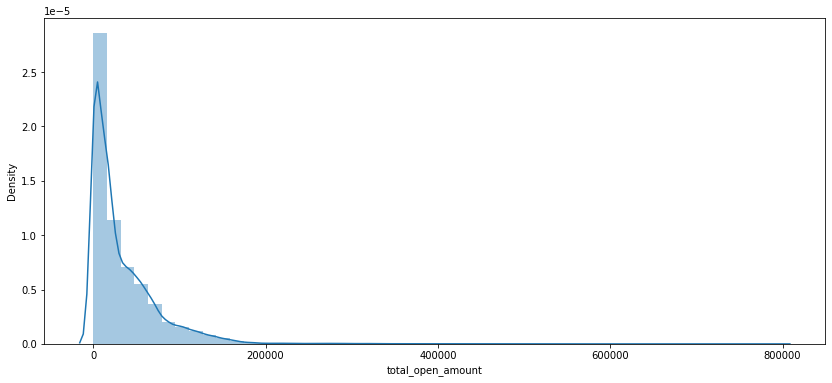

In [21]:
#Distibution of Total Open Amount
plt.figure(figsize=(14,6))
sns.distplot(data['total_open_amount'])
plt.show()

The distribution of total open amount is Positive Skewed.

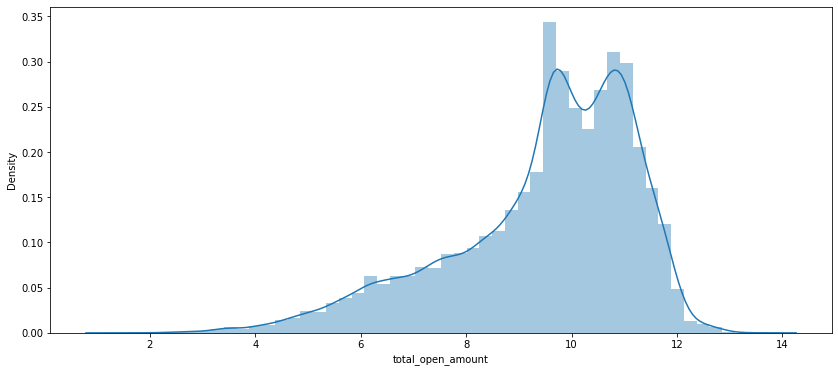

In [22]:
#Distibution of log of Total Open Amount
plt.figure(figsize=(14,6))
sns.distplot(np.log(data['total_open_amount']))
plt.show()

The distribution of log of total open amount is Negative Skewed.<br>

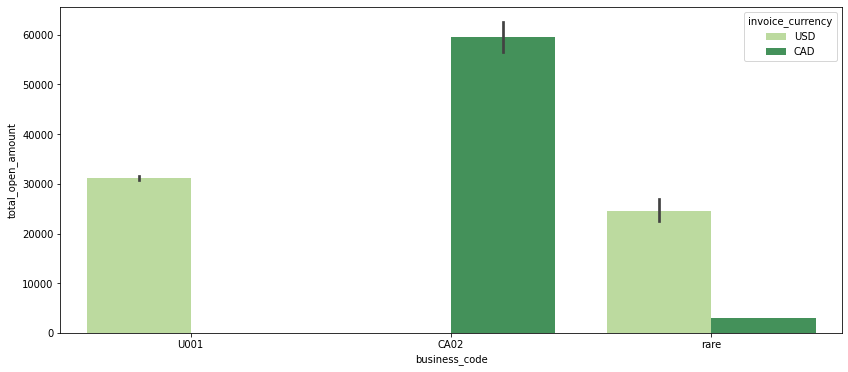

In [23]:
#Plot between BusinessCode and Total Open Amount with Invoice currency
plt.figure(figsize=(14,6))
sns.barplot(data=data,x='business_code',y='total_open_amount',hue='invoice_currency',  palette="YlGn")
plt.show()

This graph depicts the relationship between the business code and total open amount for different invoice currencies.<br>
1. For business code U001 the total open amount is only for USD and not for CAD.
2. For CA02 the total open amount is only for CAD and not for USD.
3. For rare labels of business code the mean of total open amount in USD is much higher than that of CAD.

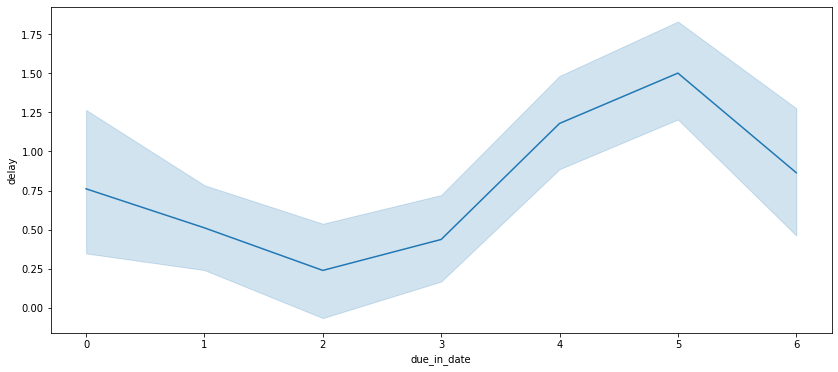

In [24]:
#Plot between due_in_date and delay
plt.figure(figsize=(14,6))
sns.lineplot(data['due_in_date'].dt.dayofweek, data['delay'])
plt.show()

This graph depicts the relationship between the weekdays of due in date and the delay.<br>

1. If the due in date is weekend(friday, saturday, and sunday) then we can conclude that the chances of delay is maximum.
2. If the due in date is on wednesday or thursday then there is a minimum chance of delay.
3. For the first half days of week the delay decreases and from wednesday is increases.

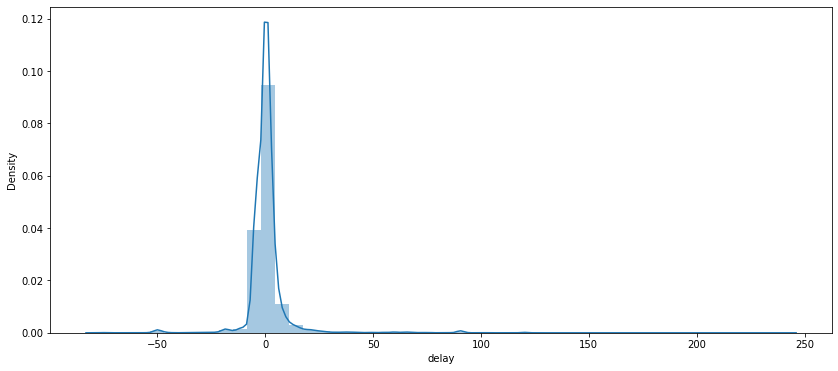

In [25]:
#Distibution of delay
plt.figure(figsize=(14,6))
sns.distplot((data['delay']))
plt.show()

For the given dataset we can find that most of delay occurs for ~20 days

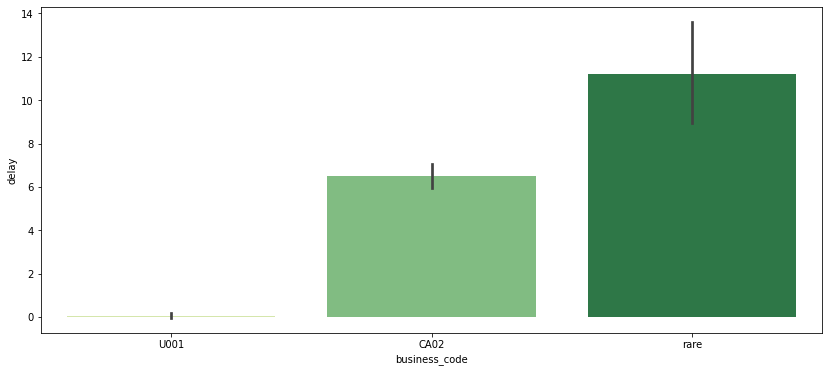

In [26]:
#Distibution of business code vs delay
plt.figure(figsize=(14,6))
sns.barplot(x='business_code', y='delay', data=data, palette="YlGn")
plt.show()

This graph depicts that business code 'rare' which includes U002, U003, U005, U007, and U013 have maximum delay.

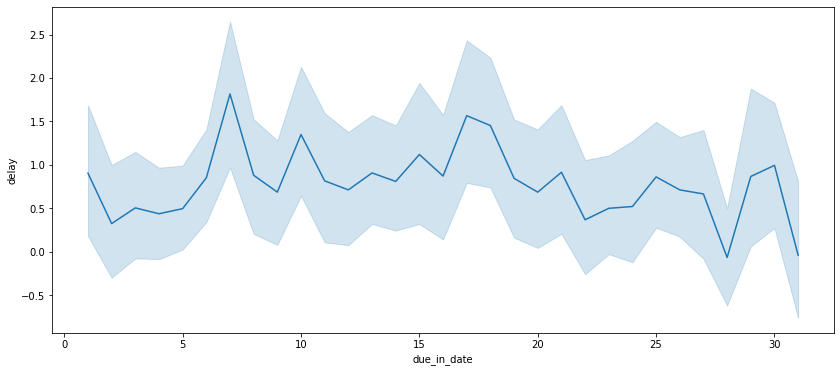

In [27]:
#Distibution of day vs delay
plt.figure(figsize=(14,6))
sns.lineplot(data['due_in_date'].dt.day, data['delay'])
plt.show()

This graph depicts the relationship between the day(1-31) of due in date and the delay.<br>

1. If the due in date is in the first half of month then we can conclude that the chances of delay is increasing.
2. If the due in date is in the next half of month then we can conclude that the chances of delay is decreasing.
3. And if the due in date is in between the middle of month(13-18) then there is a higher chance of getting delay.

In [28]:
#Binning the delay for better understanding of the pattern
data['delay_bins'] = pd.qcut(data['delay'],q=4,labels=[1,2,3,4])
data['delay_bins'].head()

27913    3
39819    3
39001    4
44697    3
42566    2
Name: delay_bins, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

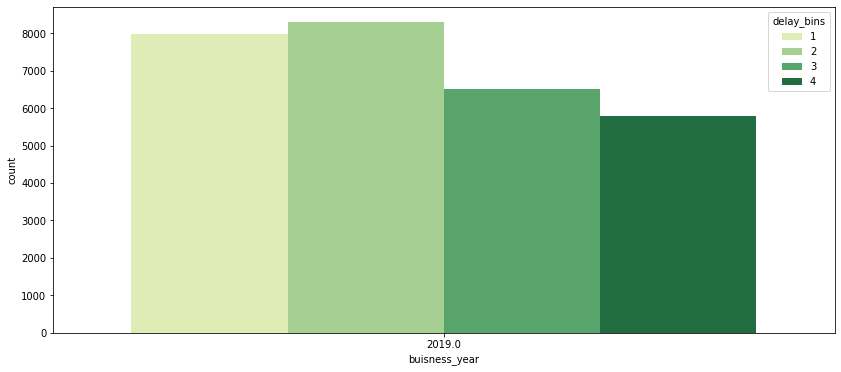

In [29]:
#This graph depicts that the in 2019 delay of type 2 has occured the most followed by delay 1, 3, and 4.
plt.figure(figsize=(14,6))
sns.countplot(data['buisness_year'], hue=data['delay_bins'], palette="YlGn")
plt.show()

The above graph depicts that for the year 2019 the delay type frequency is maximum for delay type 2 followed by type 1, type 3, and type 4

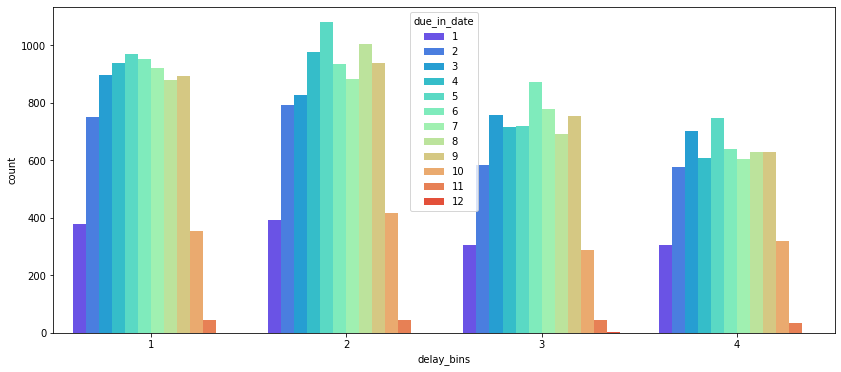

In [30]:
#This graph depicts that in the month of may the all the types of delay have maximum frequency.
plt.figure(figsize = (14,6))
sns.countplot(x = 'delay_bins', hue = data['due_in_date'].dt.month,data=data, palette='rainbow')
plt.show()

The above graph depicts that:
1. For december the frequency of each type of delay is lowest.
2. For the first 6 months the frequency of each type of delay increases.
3. For the last 6 months the frequency of each type of delay decreases.
4. The no of delay is maximum for the month of May.

In [31]:
#Mapping Customer Name for train dataset
map_cust=data.groupby("name_customer")['delay'].mean().to_dict()

In [32]:
data['Cust Mean Delay'] = data['name_customer'].map(map_cust)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,Weekday,delay_bins,Cust Mean Delay
27913,U001,0200705742,DOT foundation,2019-01-15,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,13299.43,2018-12-30,NAA8,1.928541e+09,1.0,6,3,-8.980392
39819,CA02,0140104409,LOB associates,2019-01-11,2019.0,2018-12-30,2018-12-30,2019-01-10,CAD,255978.52,2018-12-31,CA10,2.960521e+09,1.0,6,3,2.407407
39001,CA02,0140105847,GORDON F llc,2019-01-21,2019.0,2018-12-30,2018-12-30,2019-01-10,CAD,164135.60,2018-12-31,CA10,2.960521e+09,11.0,6,4,3.538462
44697,U001,0200759878,SA trust,2019-01-15,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,10674.11,2018-12-30,NAH4,1.928540e+09,1.0,6,3,1.589474
42566,U001,0200707822,PUBLI corp,2019-01-14,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,21099.14,2018-12-30,NAA8,1.928545e+09,0.0,6,2,0.673913


In [33]:
#Mapping Customer Name for Validation set
val['Cust Mean Delay'] = val['name_customer'].map(map_cust)
val['Cust Mean Delay'][val['Cust Mean Delay'].isnull()] = val['delay'].mean()
val.isnull().sum()


#Mapping Customer Name for Test set
test['Cust Mean Delay'] = test['name_customer'].map(map_cust)
test['Cust Mean Delay'][test['Cust Mean Delay'].isnull()] = test['delay'].mean()
test.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
delay                     0
Weekday                   0
Cust Mean Delay           0
dtype: int64

In [34]:
#Mapping Customer Name for train dataset
map_cust = data.groupby("cust_number")['delay'].mean().to_dict()
data['Cust Number Delay'] = data['cust_number'].map(map_cust)
data.head()

#Mapping Customer Name for Validation set 1
val['Cust Number Delay'] = val['cust_number'].map(map_cust)
val['Cust Number Delay'][val['Cust Number Delay'].isnull()] = val['delay'].mean()


#Mapping Customer Name for Validation set 2
test['Cust Number Delay'] = test['cust_number'].map(map_cust)
test['Cust Number Delay'][test['Cust Number Delay'].isnull()] = test['delay'].mean()

Detecting outlier and hnadling it

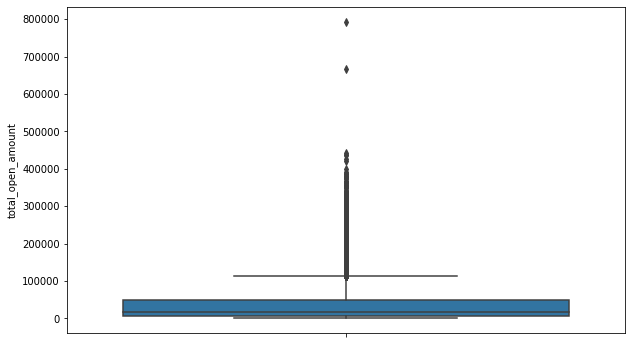

In [35]:
#Boxplot for Total Open Amount
plt.figure(figsize=(10,6))
sns.boxplot(y=data['total_open_amount'])
plt.show()

In [36]:
#Appling Tukey's Rule to remove the outlier of Total Open Amount
iqr = data['total_open_amount'].quantile(0.75) - data['total_open_amount'].quantile(0.25)
upper_boundry = data['total_open_amount'].quantile(0.25)+(iqr*1.5)
lower_boundry = data['total_open_amount'].quantile(0.25)-(iqr*1.5)
print(upper_boundry)
print(lower_boundry)

69727.35500000001
-59096.935000000005


In [37]:
data = data[data['total_open_amount']<upper_boundry]
data = data[data['total_open_amount']>lower_boundry]

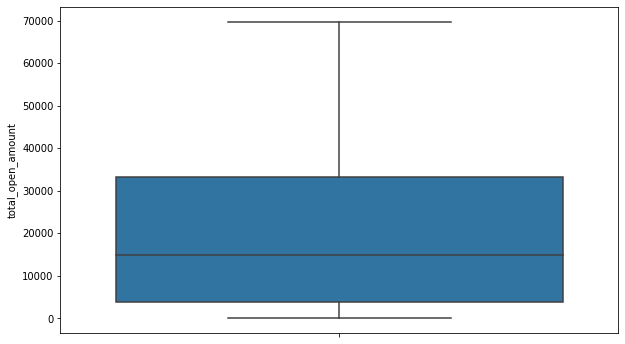

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['total_open_amount'])
plt.show()

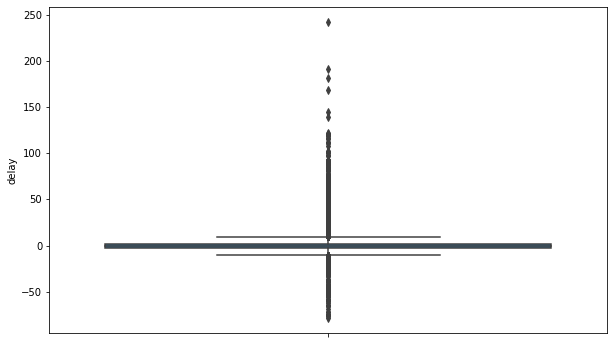

In [39]:
#Boxplot for Delay
plt.figure(figsize=(10,6))
sns.boxplot(y=data['delay'])
plt.show()

In [40]:
#Appling Tukey's Rule to remove the outlier of Delay
iqr = data['delay'].quantile(0.75) - data['delay'].quantile(0.25)
upper_boundry = data['delay'].quantile(0.25)+(iqr*1.5)
lower_boundry = data['delay'].quantile(0.25)-(iqr*1.5)
print(upper_boundry)
print(lower_boundry)

4.5
-10.5


In [41]:
data = data[data['delay']<upper_boundry]
data = data[data['delay']>lower_boundry]

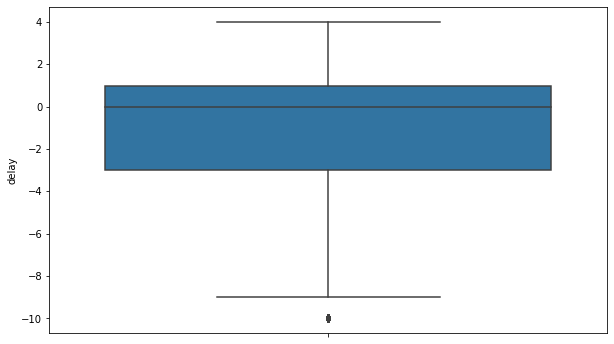

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['delay'])
plt.show()

In [43]:
data['business_code'].nunique()

3

Feature Engineering

Encoding Categorical Features on Training Dataset

In [44]:
#Encoding invoice currency using One Hot Encoder
data = pd.concat( [data, pd.get_dummies(data.invoice_currency, drop_first=True)] , axis = 1)

In [45]:
#Encoding business code using One Hot Encoder
data = pd.concat( [data, pd.get_dummies(data.business_code)] , axis = 1)

In [46]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,...,invoice_id,delay,Weekday,delay_bins,Cust Mean Delay,Cust Number Delay,USD,CA02,U001,rare
27913,U001,0200705742,DOT foundation,2019-01-15,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,13299.43,...,1.928541e+09,1.0,6,3,-8.980392,-6.956616,1,0,1,0
44697,U001,0200759878,SA trust,2019-01-15,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,10674.11,...,1.928540e+09,1.0,6,3,1.589474,1.128395,1,0,1,0
42566,U001,0200707822,PUBLI corp,2019-01-14,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,21099.14,...,1.928545e+09,0.0,6,2,0.673913,0.851942,1,0,1,0
43445,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,13649.53,...,1.928541e+09,-5.0,6,1,-2.120444,-2.150164,1,0,1,0
20943,U001,0200769623,WAL-MAR llc,2019-01-10,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,61989.53,...,1.928544e+09,-4.0,6,1,-2.328197,-2.150164,1,0,1,0


In [47]:
#Once encoded drop the features
data = data.drop(['invoice_currency'],axis=1)
data = data.drop(['business_code'],axis=1)

Encoding Categorical Features on Validation Set 1 and Validation Set 2

In [48]:
val = pd.concat( [val, pd.get_dummies(val.invoice_currency, drop_first=True)] , axis = 1)

In [49]:
test = pd.concat( [test, pd.get_dummies(test.invoice_currency, drop_first=True)] , axis = 1)

In [50]:
val = pd.concat( [val, pd.get_dummies(val.business_code)] , axis = 1)

In [51]:
test = pd.concat( [test, pd.get_dummies(test.business_code)] , axis = 1)

In [52]:
#Dropping the encoded features
val = val.drop(columns=['invoice_currency','business_code'],axis=1)
test = test.drop(columns=['invoice_currency','business_code'],axis=1)

In [53]:
#Encoding invoice currency using Target Encoding
target_mapper = data.groupby('cust_payment_terms')['delay'].mean().to_dict()

data['cust_payment_terms_new_encoded'] = data['cust_payment_terms'].map(target_mapper)
val['cust_payment_terms_new_encoded'] = val['cust_payment_terms'].map(target_mapper)
test['cust_payment_terms_new_encoded'] = test['cust_payment_terms'].map(target_mapper)

In [54]:
#Dropping the encoded features
data = data.drop(['cust_payment_terms'],axis=1)
val = val.drop(['cust_payment_terms'],axis=1)
test = test.drop(['cust_payment_terms'],axis=1)

In [55]:
#Extracting year, month, day, and dayofweek from the different Dates given for the Training Dataset
data['baseline_create_date_month'] = data['baseline_create_date'].dt.month
data['baseline_create_date_week'] = data['baseline_create_date'].dt.week
data['baseline_create_date_day'] = data['baseline_create_date'].dt.day
data['baseline_create_date_dayofweek'] = data['baseline_create_date'].dt.dayofweek
data['document_create_date.1_month'] = data['document_create_date.1'].dt.month
data['document_create_date.1_week'] = data['document_create_date.1'].dt.week
data['document_create_date.1_day'] = data['document_create_date.1'].dt.day
data['document_create_date.1_dayofweek'] = data['document_create_date.1'].dt.dayofweek
data['due_in_date_month'] = data['due_in_date'].dt.month
data['due_in_date_week'] = data['due_in_date'].dt.week
data['due_in_date_day'] = data['due_in_date'].dt.day
data['due_in_date_dayofweek'] = data['due_in_date'].dt.dayofweek
data['posting_date_month'] = data['posting_date'].dt.month
data['posting_date_week'] = data['posting_date'].dt.week
data['posting_date_day'] = data['posting_date'].dt.day
data['posting_date_dayofweek'] = data['posting_date'].dt.dayofweek

In [56]:
#Extracting year, month, day, and dayofweek from the different Dates given for the Validation Set
val['baseline_create_date_month'] = val['baseline_create_date'].dt.month
val['baseline_create_date_week'] = val['baseline_create_date'].dt.week
val['baseline_create_date_day'] = val['baseline_create_date'].dt.day
val['baseline_create_date_dayofweek'] = val['baseline_create_date'].dt.dayofweek
val['document_create_date.1_month'] = val['document_create_date.1'].dt.month
val['document_create_date.1_week'] = val['document_create_date.1'].dt.week
val['document_create_date.1_day'] = val['document_create_date.1'].dt.day
val['document_create_date.1_dayofweek'] = val['document_create_date.1'].dt.dayofweek
val['due_in_date_month'] = val['due_in_date'].dt.month
val['due_in_date_week'] = val['due_in_date'].dt.week
val['due_in_date_day'] = val['due_in_date'].dt.day
val['due_in_date_dayofweek'] = val['due_in_date'].dt.dayofweek
val['posting_date_month'] = val['posting_date'].dt.month
val['posting_date_week'] = val['posting_date'].dt.week
val['posting_date_day'] = val['posting_date'].dt.day
val['posting_date_dayofweek'] = val['posting_date'].dt.dayofweek

In [57]:
#Extracting year, month, day, and dayofweek from the different Dates given for the Test Set
test['baseline_create_date_month'] = test['baseline_create_date'].dt.month
test['baseline_create_date_week'] = test['baseline_create_date'].dt.week
test['baseline_create_date_day'] = test['baseline_create_date'].dt.day
test['baseline_create_date_dayofweek'] = test['baseline_create_date'].dt.dayofweek
test['document_create_date.1_month'] = test['document_create_date.1'].dt.month
test['document_create_date.1_week'] = test['document_create_date.1'].dt.week
test['document_create_date.1_day'] = test['document_create_date.1'].dt.day
test['document_create_date.1_dayofweek'] = test['document_create_date.1'].dt.dayofweek
test['due_in_date_month'] = test['due_in_date'].dt.month
test['due_in_date_week'] = test['due_in_date'].dt.week
test['due_in_date_day'] = test['due_in_date'].dt.day
test['due_in_date_dayofweek'] = test['due_in_date'].dt.dayofweek
test['posting_date_month'] = test['posting_date'].dt.month
test['posting_date_week'] = test['posting_date'].dt.week
test['posting_date_day'] = test['posting_date'].dt.day
test['posting_date_dayofweek'] = test['posting_date'].dt.dayofweek

In [58]:
data['cust_payment_terms_new_encoded'] = data['cust_payment_terms_new_encoded'].fillna(data['cust_payment_terms_new_encoded'].mean())
val['cust_payment_terms_new_encoded'] = val['cust_payment_terms_new_encoded'].fillna(val['cust_payment_terms_new_encoded'].mean())
test['cust_payment_terms_new_encoded'] = test['cust_payment_terms_new_encoded'].fillna(test['cust_payment_terms_new_encoded'].mean())

In [59]:
#Dropping the encoded features
data = data.drop(['posting_date','due_in_date','document_create_date.1','baseline_create_date','name_customer',
                 'cust_number', 'clear_date', 'buisness_year','delay_bins'],axis=1)

val = val.drop(['posting_date','due_in_date','document_create_date.1','baseline_create_date','name_customer',
                 'cust_number', 'buisness_year', 'clear_date'],axis=1)

test = test.drop(['posting_date','due_in_date','document_create_date.1','baseline_create_date','name_customer',
                 'cust_number', 'buisness_year', 'clear_date'],axis=1)

In [60]:
print(data.shape)
print(val.shape)
print(test.shape)

(21263, 27)
(7000, 27)
(7000, 27)


Feature Selection

In [61]:
#Feature Selection by filter method
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(data)

len(data.columns[constant_filter.get_support()])

constant_columns = [column for column in data.columns
                    if column not in data.columns[constant_filter.get_support()]]

data.drop(labels=constant_columns, axis=1, inplace=True)

In [62]:
qconstant_filter = VarianceThreshold(threshold=0.02)

In [63]:
X_train = data.drop('delay', axis=1)
y_train = data['delay']

X_val = val.drop(columns=['delay'], axis=1)
y_val = val['delay']

In [64]:
X_train.shape

(21263, 26)

In [65]:
X_val.shape

(7000, 26)

In [66]:
# Defining lists to store the scores and names of predictive model used
MSE_Score = []
RMSE = []
Algorithm = []

In [73]:
#Linear Regression
Algorithm.append('Linear Regression')
clf = LinearRegression(normalize=bool)
clf.fit(X_train, y_train)

predicted = clf.predict(X_val)

MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE.append(mean_squared_error(y_val, predicted, squared=False))

In [69]:
#Decision Tree
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_val)

MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE.append(mean_squared_error(y_val, predicted, squared=False))

In [70]:
# Random Forest Regressor
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_val)

MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE.append(mean_squared_error(y_val, predicted, squared=False))

In [74]:
# Gradient Boosting Regressor
Algorithm.append('Gradient Boosting Regressor')
clf = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70, max_depth=3, max_leaf_nodes=20, random_state=42)
clf.fit(X_train, y_train)

predicted = clf.predict(X_val)

MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE.append(mean_squared_error(y_val, predicted, squared=False))

In [75]:
modelCompare = pd.DataFrame(list(zip(Algorithm, MSE_Score, RMSE)), columns = ['Algorithm', 'MSE_Score', 'RMSE_Score'])
modelCompare

,Algorithm,MSE_Score,RMSE_Score
0,Linear Regression,69.637459,8.344906
1,Linear Regression,78.478714,8.858821
2,Decision Tree Regressor,75.308653,8.678056
3,Random Forest Regressor,74.504552,8.631602
4,Gradient Boosting Regressor,69.637459,8.344906
5,Linear Regression,74.504552,8.631602


In [ ]:
#Since Linear Regression, and Random Forest Regressor both are performing well then we can select
#anyone of these method and make the predictions for the test dataset.